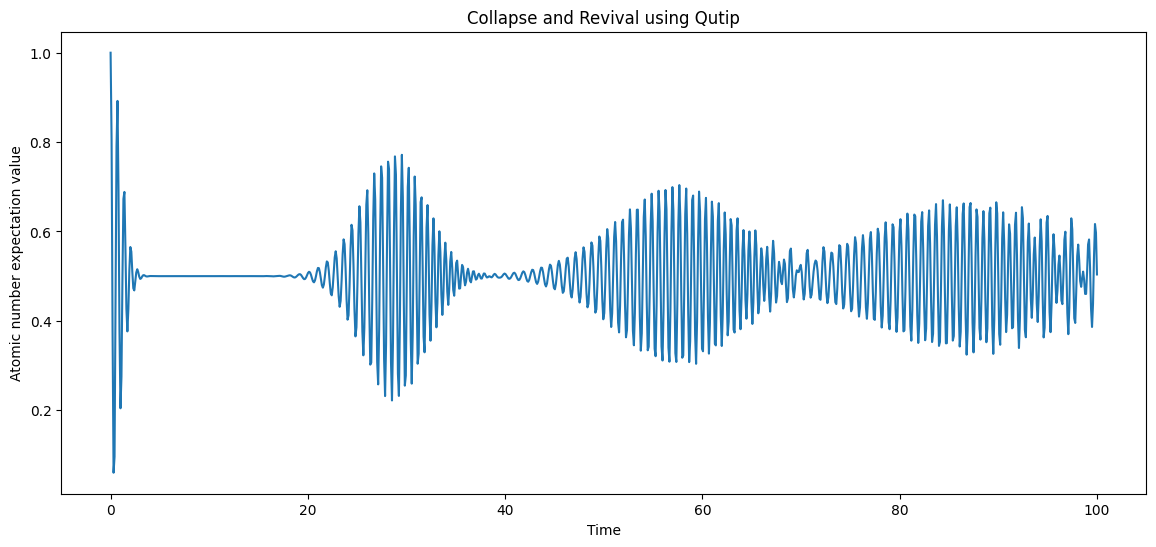

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
N = 40  # Number of photon states in the cavity
wc = 1  # Cavity frequency
wa = 1  # Atom frequency
g = 1   # Coupling strength

# Operators
a = tensor(qeye(2), destroy(N))  # Cavity destruction operator
sm = tensor(destroy(2), qeye(N))  # Atomic lowering operator
na = sm.dag() * sm  # Atomic number operator
nc = a.dag() * a    # Cavity number operator

# Hamiltonian
H = wc * nc + wa * na + g * (a.dag() * sm + a * sm.dag())

# Initial coherent superposition of the atom
alpha = np.sqrt(20)  # Coherent state amplitude
psi_cavity = coherent(N, alpha) 
#print(psi_cavity)
psi_atom = basis(2, 1)  # Atom starts in the ground state
#print(psi_atom)
psi0 = tensor(psi_atom, psi_cavity)  # Combined initial state
# Time vector
t = np.linspace(0, 100, 1000)
rho = psi0 * psi0.dag()

# Solve the dynamics
output = mesolve(H, psi0, t, [], [sm.dag() * sm])
#print(output.expect[0])

# Plot the result
plt.figure(figsize=(14, 6))
plt.plot(t, output.expect[0])
plt.xlabel('Time')
plt.ylabel('Atomic number expectation value')
plt.title('Collapse and Revival using Qutip')
plt.show()
